In [1]:
#!/usr/bin/env python3
import numpy as np
import matplotlib.pyplot as plt
import glob

try:
    import mplhep as hep
    hep.style.use("ATLAS")
except:
    pass

In [2]:
# Load data for efficiencies including the HTmiss cut
sr = 'high-ET'
dt = {'names':['mS', 'm1', 'm0', 'ctau', 'eff'], 'formats': [float]*5}
all_data_withCut = np.array([], dtype=dt)
for effFile in glob.glob('./effs/*withCut*.csv'):
    data_recast = np.genfromtxt(effFile,skip_header=2,delimiter=',',names=True)
    tauN = data_recast['ctaum']
    eff = data_recast['eff'+sr.replace('-','')]
    labels = effFile.split('_') # hack to get masses (fix it!)
    mS,m1,m0 = float(labels[1]),float(labels[2]),float(labels[3])
    data = np.zeros(len(eff), dtype=dt)
    data['mS'],data['m1'],data['m0'] = mS,m1,m0
    data['ctau'] = tauN
    data['eff'] = eff
    all_data_withCut = np.append(all_data_withCut,data)

# Load data for efficiencies without the HTmiss cut
sr = 'high-ET'
dt = {'names':['mS', 'm1', 'm0', 'ctau', 'eff'], 'formats': [float]*5}
all_data_noCut = np.array([], dtype=dt)
for effFile in glob.glob('./effs/*noCut*.csv'):
    data_recast = np.genfromtxt(effFile,skip_header=2,delimiter=',',names=True)
    tauN = data_recast['ctaum']
    eff = data_recast['eff'+sr.replace('-','')]
    labels = effFile.split('_') # hack to get masses (fix it!)
    mS,m1,m0 = float(labels[1]),float(labels[2]),float(labels[3])
    data = np.zeros(len(eff), dtype=dt)
    data['mS'],data['m1'],data['m0'] = mS,m1,m0
    data['ctau'] = tauN
    data['eff'] = eff
    all_data_noCut = np.append(all_data_noCut,data)    

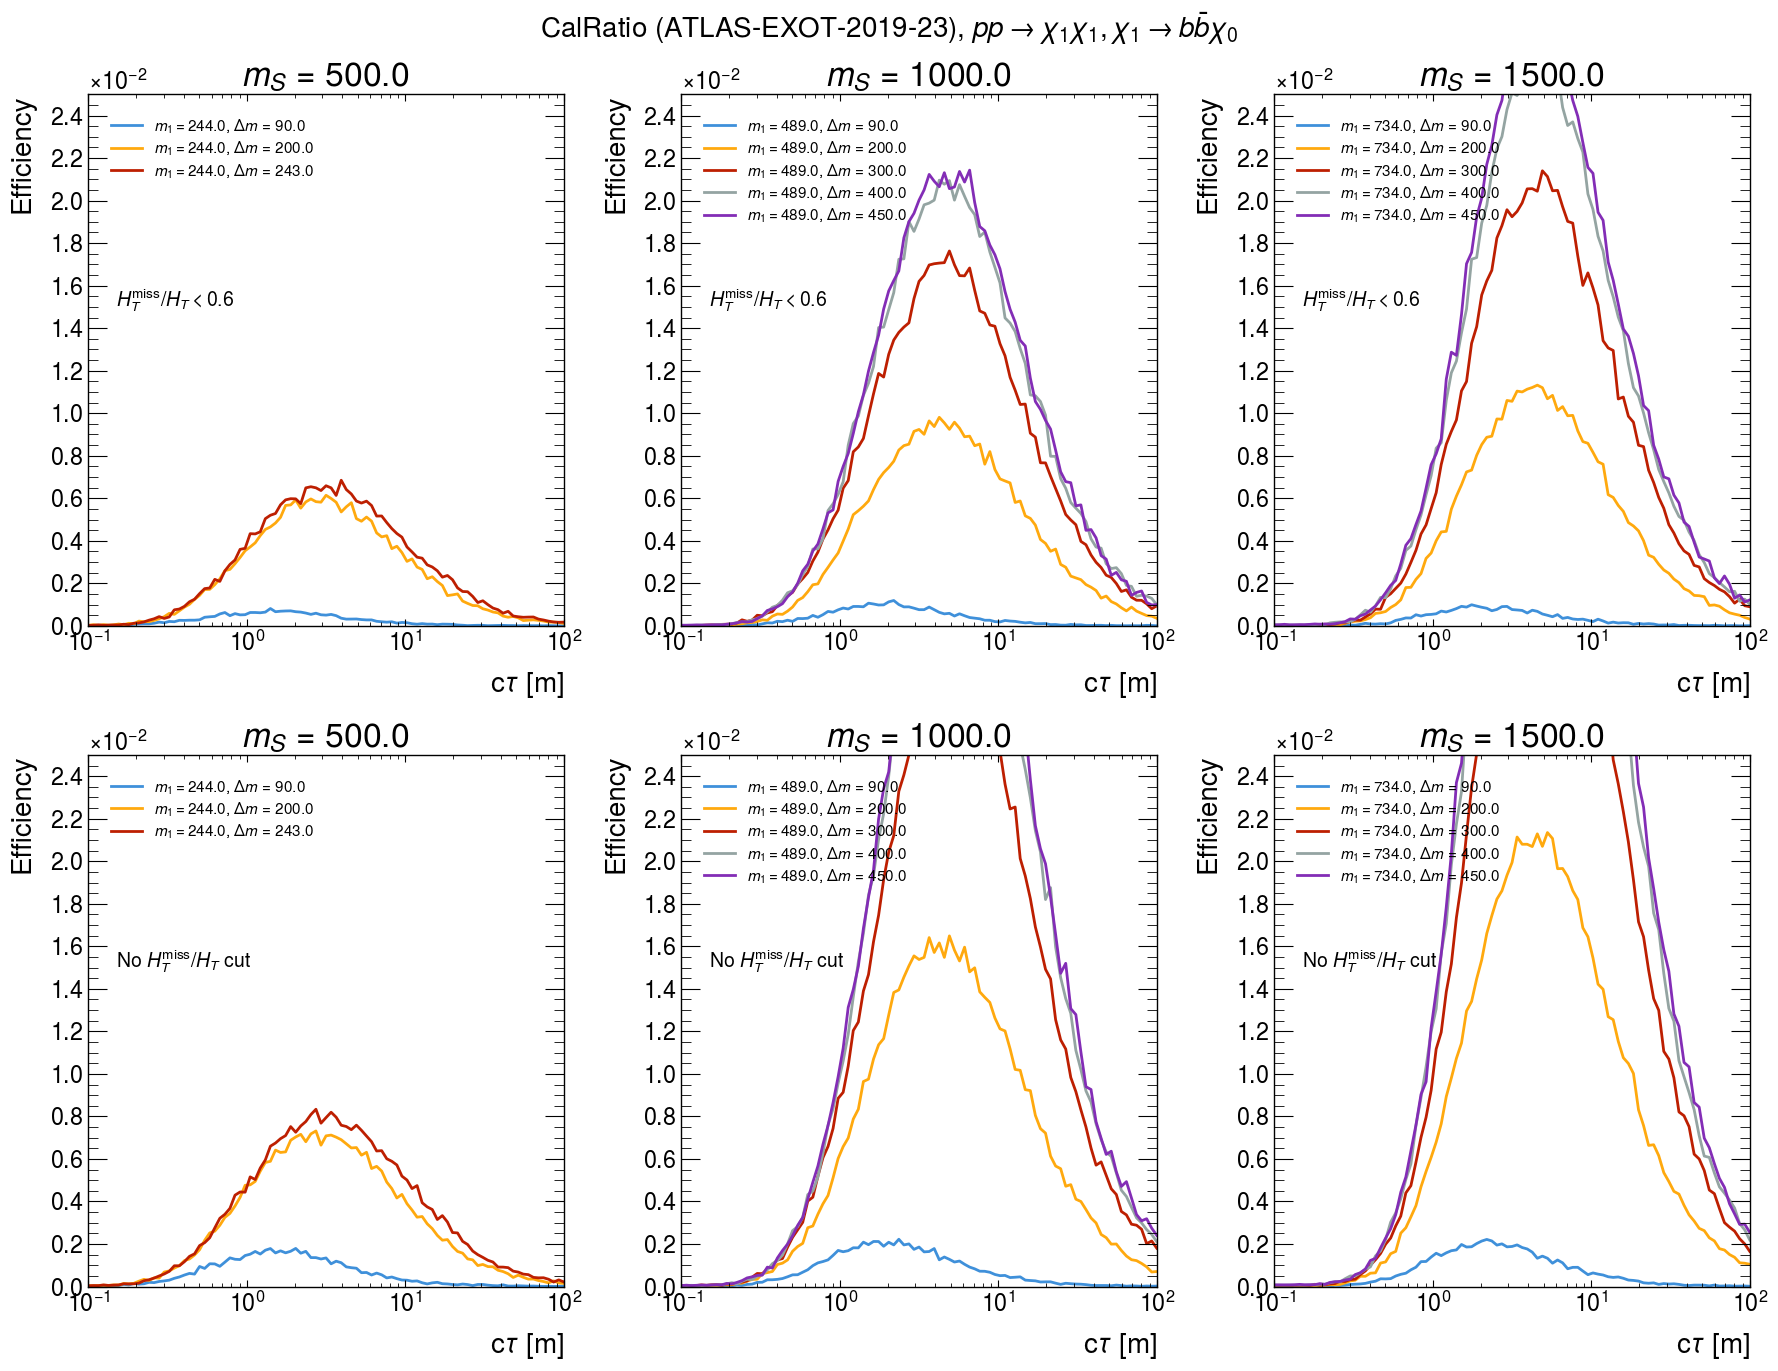

In [9]:
# Plot data

mS_values = sorted(np.unique(all_data_withCut['mS']))
nplots = len(mS_values)
fig,axarr = plt.subplots(nrows=2,ncols=nplots,figsize=(6*nplots,14))
axarr = np.array(axarr)
for irow,all_data in enumerate([all_data_withCut,all_data_noCut]):
    for icol,mS in enumerate(np.unique(all_data['mS'])):
        ax = axarr[irow,icol]
        data_mS = all_data[all_data['mS'] == mS]
        ax.set_title(rf'$m_S$ = {mS}')
        for m1,m0 in sorted(np.unique(data_mS[['m1','m0']]).tolist(),reverse=True):
            if m1-m0 > 450.0:
                continue
            data = data_mS[(data_mS['m1'] == m1) & (data_mS['m0'] == m0)]

    #     ################## Plot efficiency from MG+Pythia8 ##################
            ax.plot(data['ctau'],data['eff'], linewidth=2, label = rf'$m_1 = {m1}$, $\Delta m$ = {m1-m0}')

    #     # ################## Uncertainties from Map ##################
    #     # plt.fill_between(tauN, np.array(eff) + 0.25* np.array(eff), np.array(eff) - 0.25 * np.array(eff), alpha=.5)
        ax.set_xscale('log')
        # plt.yscale('log')
        ax.set_xlabel(r'c$\tau$ [m]', fontsize=20)
        ax.set_ylabel('Efficiency', fontsize=20 )
        # ax.set_ylim(1e-4,0.1)
        # ax.set_yscale('log')
        ax.set_yticks(np.arange(0.0,0.025,0.002))
        ax.set_ylim(0,0.025)
        
        if all_data is all_data_withCut:
            ax.text(1.5*min(data['ctau']),1.5e-2,r'$H_T^{\rm miss}/H_T < 0.6$')
        elif all_data is all_data_noCut:
            ax.text(1.5*min(data['ctau']),1.5e-2,r'No $H_T^{\rm miss}/H_T$ cut')


        # ################## Limits of validity ##################
        # ax.hlines(y=(0.25*(max(eff))), xmin=0, xmax=1e2, linewidth=2, color='g', label = 'Limits of validity' )

        ax.legend(fontsize = 11, loc='upper left',framealpha=0.7,facecolor='white')
        # ax.
        # x = np.linspace(0,100)
        # ax.fill_between(x, 0.25*(max(eff)), color='black', alpha=.2, hatch="/", edgecolor="black", linewidth=1.0) # adding hatch

# plt.legend(fontsize = 11, loc='upper left') # set the legend in the upper right corner
plt.suptitle(r'CalRatio (ATLAS-EXOT-2019-23), $p p \to \chi_1 \chi_1, \chi_1 \to b \bar{b} \chi_0$',fontsize=20)
plt.tight_layout()
plt.savefig('calRatio_effs.png')
plt.show()